In [15]:
from openpyxl import Workbook
from openpyxl.styles import Border, PatternFill, Side, Alignment, Font
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Create a new workbook
wb = Workbook()
ws = wb.active
ws.title = "Folha_Cert"

now = datetime.now()
new_date = now + relativedelta(months=3)

# Sample data (replace with your actual data)
data = [
    ["Data Subscribe", "Value Subscribe", "Data Renew", "Debs Tax", "Recover"],
    ["28/12/2022", 100, '28/03/2023', 0.0284, "TRUE"],
    ["06/01/2023", 4000, '06/04/2023', 0.0309, "TRUE"],
    ["23/01/2023", 1100, '23/04/2023', 0.0309, "TRUE"],
    ["06/03/2023", 2000, '06/06/2023', 0.0350, "TRUE"],
    ["22/05/2023", 2000, '22/08/2023', 0.0350, "TRUE"],
    ["31/07/2023", 3000, '31/10/2023', 0.0275, "TRUE"],
    ["25/09/2023", 2500, '25/12/2023', 0.0275, "TRUE"],
    ["01/02/2024", 3000, '01/05/2024', 0.0275, "FALSE"],
    ["27/03/2024", 1500, '27/06/2024', 0.0275, "FALSE"],
    ["27/06/2024", 2000, '27/09/2024', 0.0275, "FALSE"]
]

number_format = "[$-409]DD[/MM[/YYYY]]"
date_format = ws.cell(row=3, column=1).number_format  # Get default format
alignment = Alignment(horizontal='center')

# Input data in table using "data" array
for row in range(2, len(data) + 2):  
    for col in range(1, len(data[0]) + 1):
        ws.cell(row=row, column=col).value = data[row - 2][col - 1]

# Manually apply bold text and align header for center
for i in range(1, int(ws.max_column) + 1):
    ws.cell(row=2, column=i).alignment = alignment
    ws.cell(row=2, column=i).font = Font(bold=True)

# Manually apply borders and styles (example)
for row in range(1, len(data) + 2):
    for col in range(1, len(data[0]) + 1):
        cell = ws.cell(row=row, column=col)
        
        # Set borders
        cell.border = Border(top=Side(style='thin'), bottom=Side(style='thin'),
                             left=Side(style='thin'), right=Side(style='thin'))
        # Set background color (example)
        if row == 2:  # Format borders header and color
            cell.fill = PatternFill(start_color='FF90C2F0', end_color='FF90C2F0', fill_type='solid')
        if col == 2 and row >= 3: # Format money invested in Aforro
            cell.number_format = "#,##0€"
        elif col == 4 and row >= 3: # Format tax applied
            percentage_value = cell.value * 100
            cell.value = percentage_value

# Save the workbook
wb.save("formatted_table.xlsx")
wb.close()

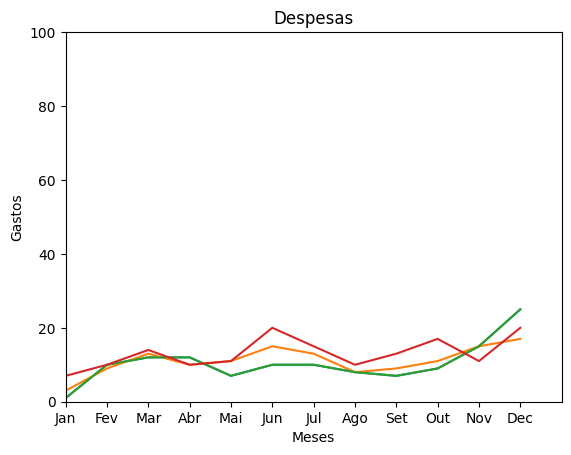

In [4]:
import matplotlib.pyplot as plt

plt.axis((0, 12, 0, 100))

x = ['Jan','Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set','Out','Nov','Dec']
y = [1, 10, 12, 12, 7, 10, 10, 8,7,9,15,25]
gas = [3, 9, 13, 10, 11, 15, 13, 8, 9,11,15,17]
elect = [7, 10, 14, 10, 11, 20, 15, 10, 13, 17, 11,20]
agua = [17, 15, 14, 5, 10, 13, 16, 18, 20, 22, 25,30]

plt.plot(x, y, gas)  # gráfico de linhas
plt.plot( x, y, elect) 
plt.title("Despesas")
plt.xlabel("Meses")
plt.ylabel("Gastos")

plt.show()


In [5]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import joblib

df = pd.read_csv('music.csv')

inputs = df.drop(['genre'], axis = 'columns')
target = df['genre']
model = DecisionTreeClassifier(model.random_state=5)

# getting data using information integer by inputs and targets
inputs_train, inputs_test, target_train, target_test = train_test_split(inputs, target, test_size = 0.8, stratify=target, random_state=5)

model.fit(inputs_train, target_train)

# getting data using information integer by inputs and targets
predictions = model.predict(inputs_test) 
# accurancy of data using some informations, line 8
score = accuracy_score(target_test, predictions)
score

0.4666666666666667

In [2]:
from openpyxl import load_workbook
from openpyxl.styles import Border, Side, PatternFill
from datetime import datetime
from dateutil.relativedelta import relativedelta
from colorama import Fore, Style


def save_info(file_to_load):
    wb = load_workbook(filename=file_to_load)
    sheet_ranges = wb['Folha_Cert']

    now = datetime.now()
    new_date = now + relativedelta(months=3)
    value_invest = int(input("Value invest: "))

    data = [
        [now.strftime("%d/%m/%Y"), int(value_invest), new_date.strftime("%d/%m/%Y"), 0.0275, "FALSE"]
    ]

    for row in range(2, len(data) + 2):
        max_row = sheet_ranges.max_row + 1
        for col in range(1, len(data[0]) + 1):
            sheet_ranges.cell(row=max_row, column=col).value = data[row - 2][col - 1]
            cell = sheet_ranges.cell(row=max_row, column=col)

            # Formatting borders data
            cell.border = Border(top=Side(style='thin'), bottom=Side(style='thin'), left=Side(style='thin'),
                                 right=Side(style='thin'))

            # Formatting cells
            if col == 2 and cell.row == max_row:
                cell.number_format = '#,##0€'
            elif col == 4 and cell.row == max_row:  # Format tax applied
                cell.value = round(cell.value * 100, 2)

    print(Style.BRIGHT + "The invest was added with success!")

    wb.save(file_to_load)

    print(Style.BRIGHT + Fore.GREEN + "Document saved!")
    wb.close()
    print(Style.BRIGHT + Fore.WHITE + "Document close!")


def update_info(file_to_load):
    wb = load_workbook(filename=file_to_load)
    sheet_ranges = wb['Folha_Cert']

    #value_updated = int(input("Value updated: "))
    #sheet_ranges.cell(row=24, column=2).value = value_updated
    
    wb.save(file_to_load)
    remove_rows(file_to_load)
    print(Style.BRIGHT + Fore.GREEN + "Document saved!")


def remove_rows(file_to_load):
    wb = load_workbook(filename=file_to_load)
    sheet_ranges = wb['Folha_Cert']
    line, _ = 3, 1
    for row in sheet_ranges.iter_rows(min_row=3, max_col=sheet_ranges.max_column, max_row=sheet_ranges.max_row, values_only=True):
        for cell in row:
            if cell == 0:
                sheet_ranges.delete_rows(line, amount=1)
        line += 1
    wb.save(file_to_load)
    wb.close()
    print(Style.BRIGHT + Fore.WHITE + "Document close!")


opt_menu = 0

while opt_menu < 3:
    print(Style.BRIGHT + Fore.WHITE + ''' 
    1 - Adding new register
    2 - Update investments
    3 - Exit
    ''')
    option = int(input(Style.BRIGHT + Fore.WHITE + "Option: "))

    if option == 1:
        opt_menu = option
        file = str(input("Name of file: "))
        save_info(file)  # to insert
    if option == 2:
        opt_menu = option
        file = str(input("Name of file: "))
        update_info(file)
    if option == 3:
        opt_menu = option
        print("Done!!")

 
    1 - Adding new register
    2 - Update investments
    3 - Exit
    


Option:  1
Name of file:  formatted_table.xlsx
Value invest:  1550


Document saved!
Document close!
 
    1 - Adding new register
    2 - Update investments
    3 - Exit
    


Option:  3


Done!!


In [1]:
import pandas as pd
from tabulate import tabulate
import glob

df = pd.read_excel('formatted_table.xlsx', sheet_name='Folha_Cert', header=1, engine='openpyxl', usecols='A:E')
print(tabulate(df, headers = 'keys', tablefmt = 'fancy_grid'))

╒════╤══════════════════╤═══════════════════╤══════════════╤════════════╤═══════════╕
│    │ Data Subscribe   │   Value Subscribe │ Data Renew   │   Debs Tax │ Recover   │
╞════╪══════════════════╪═══════════════════╪══════════════╪════════════╪═══════════╡
│  0 │ 28/12/2022       │               100 │ 28/03/2023   │     2.84   │ True      │
├────┼──────────────────┼───────────────────┼──────────────┼────────────┼───────────┤
│  1 │ 06/01/2023       │              4000 │ 06/04/2023   │     3.09   │ True      │
├────┼──────────────────┼───────────────────┼──────────────┼────────────┼───────────┤
│  2 │ 23/01/2023       │              1100 │ 23/04/2023   │     3.09   │ True      │
├────┼──────────────────┼───────────────────┼──────────────┼────────────┼───────────┤
│  3 │ 06/03/2023       │              2000 │ 06/06/2023   │     3.5    │ True      │
├────┼──────────────────┼───────────────────┼──────────────┼────────────┼───────────┤
│  4 │ 22/05/2023       │              2000 │ 22/08/20

In [2]:
for x in range(1,11):
    print(" " * (10 - x) + "*" * x + "*" * x)

          
         **
        ****
       ******
      ********
     **********
    ************
   **************
  ****************
 ******************
********************


In [16]:
#How tall is Big Ben? - www.101computing.net/how-tall-is-big-ben-python-challenge/
# h = 2.51
# l = 1.74
# L = 66.55
#
# Input
h = float(input("height of the telephone box"))
l = float(input("height of the telephone box shadow"))
L = float(input("length of the shadow of the Elizabeth Tower"))

# Process
H = (h*L) / l

# Output
print(f"the height of the Eiffel Tower: {H:.2f}")

height of the telephone box 2.51
height of the telephone box shadow 1.74
length of the shadow of the Elizabeth Tower 66.55


the height of the Eiffel Tower: 96.00


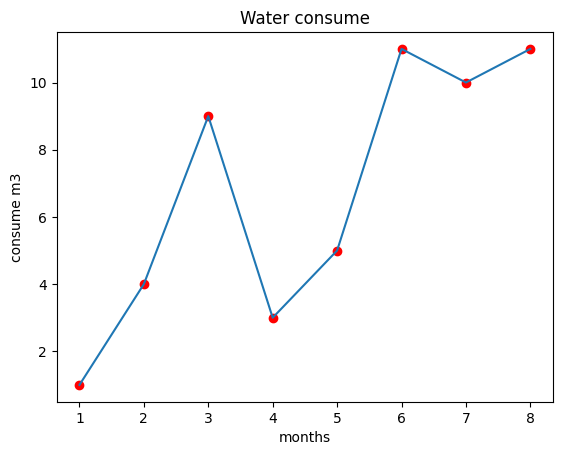

In [42]:
from matplotlib import pyplot as plt

plt.plot([1, 2, 3, 4, 5, 6, 7, 8], [1, 4, 9, 3, 5, 11, 10, 11], 'ro')
plt.plot([1, 2, 3, 4, 5, 6, 7, 8], [1, 4, 9, 3, 5, 11, 10, 11])
plt.title("Water consume")
plt.xlabel('months')
plt.ylabel('consume m3')
plt.show()